In [1]:
import glob
import re
import numpy as np
from scipy.optimize import curve_fit

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

matplotlib.rcParams['xtick.labelsize']=20
matplotlib.rcParams['ytick.labelsize']=20
matplotlib.rcParams['font.size']=25
matplotlib.rcParams['legend.fontsize']=20
matplotlib.rcParams['axes.labelsize']=20
matplotlib.rcParams['text.latex.preamble']=[r'\usepackage{bm}', r'\usepackage{textgreek}', r'\usepackage{sfmath}', r'\usepackage{siunitx}', r'\sisetup{per-mode=reciprocal}    ', r'\DeclareSIUnit\Molar{M}']
#matplotlib.rc('text',usetex=True)

/var/folders/2t/py1xp77n1r5gmz9pppl024n40000gn/T/ipykernel_44852/2486531387.py:15: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble']=[r'\usepackage{bm}', r'\usepackage{textgreek}', r'\usepackage{sfmath}', r'\usepackage{siunitx}', r'\sisetup{per-mode=reciprocal}    ', r'\DeclareSIUnit\Molar{M}']


In [2]:
directory = '/Users/sebastian/Desktop/hydro_diam/'
p_files = glob.glob(directory + "particle_*.dat")
f_files = glob.glob(directory + "fluid_*.dat")

In [3]:
print(p_files)
forces = []
#f_files
for file in p_files:
    force = re.findall(r"/Users/sebastian/Desktop/hydro_diam/particle_velocity_[-+]?([0-9]*\.[0-9]+|[0-9]+).dat", file)
    #print(float(force[0]))
    forces = np.append(forces, float(force[0]))
    
print(forces)

['/Users/sebastian/Desktop/hydro_diam/particle_velocity_0.015625.dat', '/Users/sebastian/Desktop/hydro_diam/particle_velocity_0.0546875.dat', '/Users/sebastian/Desktop/hydro_diam/particle_velocity_0.023437500000000003.dat', '/Users/sebastian/Desktop/hydro_diam/particle_velocity_0.078125.dat', '/Users/sebastian/Desktop/hydro_diam/particle_velocity_0.0703125.dat', '/Users/sebastian/Desktop/hydro_diam/particle_velocity_0.0390625.dat', '/Users/sebastian/Desktop/hydro_diam/particle_velocity_0.03125.dat', '/Users/sebastian/Desktop/hydro_diam/particle_velocity_0.0078125.dat', '/Users/sebastian/Desktop/hydro_diam/particle_velocity_0.0625.dat', '/Users/sebastian/Desktop/hydro_diam/particle_velocity_0.04687500000000001.dat']
[0.015625  0.0546875 0.0234375 0.078125  0.0703125 0.0390625 0.03125
 0.0078125 0.0625    0.046875 ]


[[0.02232543 0.00045723]
 [0.07814909 0.00069729]
 [0.03350833 0.00056575]
 [0.11163247 0.00073283]
 [0.10046455 0.00071859]
 [0.05583433 0.000664  ]
 [0.04465717 0.00062659]
 [0.01117004 0.00027616]
 [0.08931575 0.00070853]
 [0.06698901 0.00068548]]


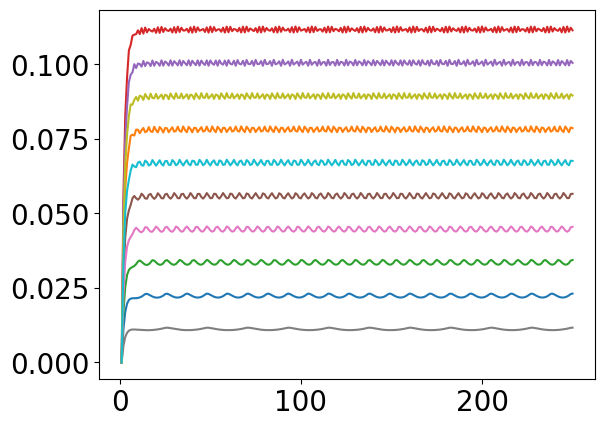

In [4]:
p_collection = []

for data in p_files:
    time = np.genfromtxt(data, delimiter=';')[:,0]
    vel = -np.genfromtxt(data, delimiter=';')[:,1]
    mean = np.mean(vel[-100:])
    std = np.std(vel[-100:])
    p_collection = np.append(p_collection, [mean,std])
    plt.plot(time, vel)

p_collection = np.reshape(p_collection, (-1,2))
print(p_collection)

[[1.31669289e-04 1.21950556e-07]
 [5.91731558e-05 4.52568479e-08]
 [7.38508431e-05 5.25538046e-08]
 [1.48315738e-05 2.29308321e-08]
 [8.84536461e-05 9.48868298e-08]
 [4.44330945e-05 3.20974697e-08]
 [1.45831115e-04 1.81823418e-07]
 [1.02965768e-04 9.88198720e-08]
 [1.17373080e-04 1.03026110e-07]
 [2.96486684e-05 2.28280136e-08]]


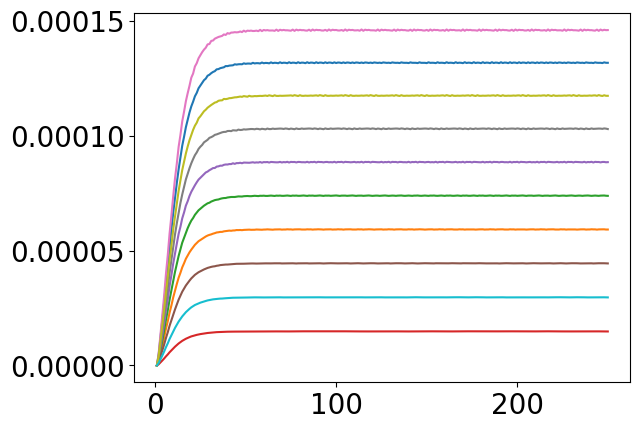

In [5]:
f_collection = []

for data in f_files:
    time = np.genfromtxt(data, delimiter=';')[:,0]
    vel = np.genfromtxt(data, delimiter=';')[:,1]
    mean = np.mean(vel[-100:])
    std = np.std(vel[-100:])
    f_collection = np.append(f_collection, [mean,std])
    plt.plot(time, vel)

f_collection = np.reshape(f_collection, (-1,2))
print(f_collection)

In [6]:
ratio = f_collection[:,0] / p_collection[:,0]
print(ratio)

[0.00589773 0.00075718 0.00220395 0.00013286 0.00088045 0.0007958
 0.00326557 0.00921803 0.00131414 0.00044259]


F = 6 * \pi * \eta * R * v

In [7]:
def func(forces, R):
    return (forces / (6 * np.pi * 1 * R))
    
popt, pcov = curve_fit(func, forces, p_collection[:,0])
print(popt)

[0.03712509]


Text(0, 0.5, 'velocity')

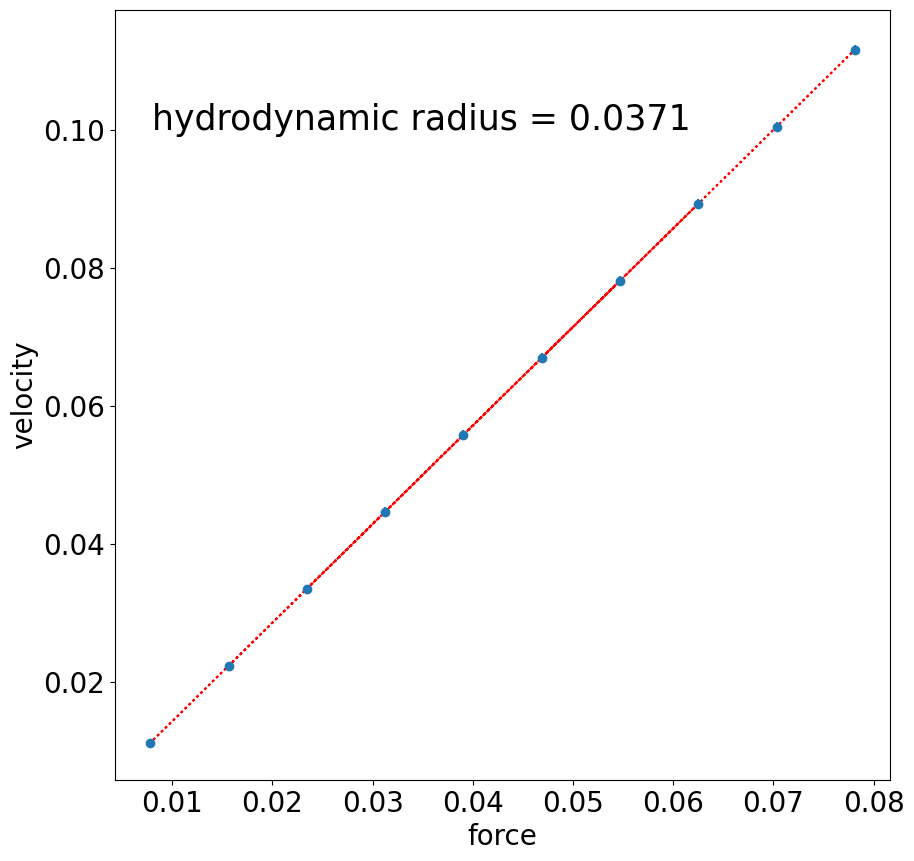

In [23]:
plt.figure(figsize=(10,10))
plt.errorbar(forces,
             p_collection[:,0],
             yerr=p_collection[:,1],
             fmt='o')
plt.plot(forces, func(forces, *popt), 'r:')
plt.text(0.008, 0.1, "hydrodynamic radius = 0.0371")
plt.xlabel(r"force")
plt.ylabel(r"velocity")